In [29]:
%pip install pandas matplotlib seaborn numpy scipy statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/fb/b1/b16836310f6ca89ddfb30fe65f8851c1a8d63152190ed740a236eca15012/statsmodels-0.14.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 3.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 4.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from scipy.stats import pearsonr

In [23]:
# Load the CSV data into a DataFrame
data_files = [
    "benchmark_bruteForceWithValidCheck.csv",
    "benchmark_ac3.csv",
    "benchmark_minimumRemainingValue.csv"
]

In [28]:
# 1. Create histograms of the iterations per strategy, source and level
def plot_histograms(data):
    g = sns.FacetGrid(data, col="source", row="level", margin_titles=True, height=4, aspect=1.5, sharex=False, sharey=False)
    g.map(plt.hist, 'iterations', alpha=0.6, bins=50)
    plt.legend(title='Level')
    plt.show()

In [18]:
def plot_qq_plots(data):
    # Creating a unique identifier for each combination
    data['group'] = data['source'] + '_L' + data['level'].astype(str)
    unique_groups = data['group'].unique()
    
    # Set up the matplotlib figure with a grid
    n = len(unique_groups)
    cols = 3  # You can change this to have more or fewer columns
    rows = np.ceil(n / cols)
    fig, axes = plt.subplots(int(rows), int(cols), figsize=(cols*5, rows*5))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot Q-Q plots for each group
    for i, group in enumerate(unique_groups):
        ax = axes[i]
        group_data = data[data['group'] == group]['iterations']
        qqplot(group_data, line='s', ax=ax)  # 's' means standardized line fit
        ax.set_title(group)
    
    # Hide unused subplots if there are any
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


In [21]:
# 3. Calculate how much the level and iteration avg per strategy, source level correlate and visualize it
def correlation_analysis(data):
    # Create separate plots for each source
    sources = data['source'].unique()
    fig, axes = plt.subplots(nrows=len(sources), ncols=1, figsize=(8, 5 * len(sources)), squeeze=False)
    axes = axes.flatten()

    for i, source in enumerate(sources):
        ax = axes[i]
        # Filter data by source
        source_data = data[data['source'] == source]
        # Group by level and calculate mean iterations
        corr_df = source_data.groupby('level')['iterations'].mean().reset_index()
        # Calculate Pearson correlation
        correlation, _ = pearsonr(corr_df['level'], corr_df['iterations'])
        # Scatter plot of average iterations vs. level
        sns.scatterplot(data=corr_df, x='level', y='iterations', ax=ax)
        ax.set_title(f'Source: {source} - Correlation: {correlation:.2f}')
        ax.set_xlabel('Level')
        ax.set_ylabel('Average Iterations')

    plt.tight_layout()
    plt.show()

/var/folders/qq/czk1bcl906j40ln30pltk8b80000gn/T/ipykernel_71548/3479550136.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Level')


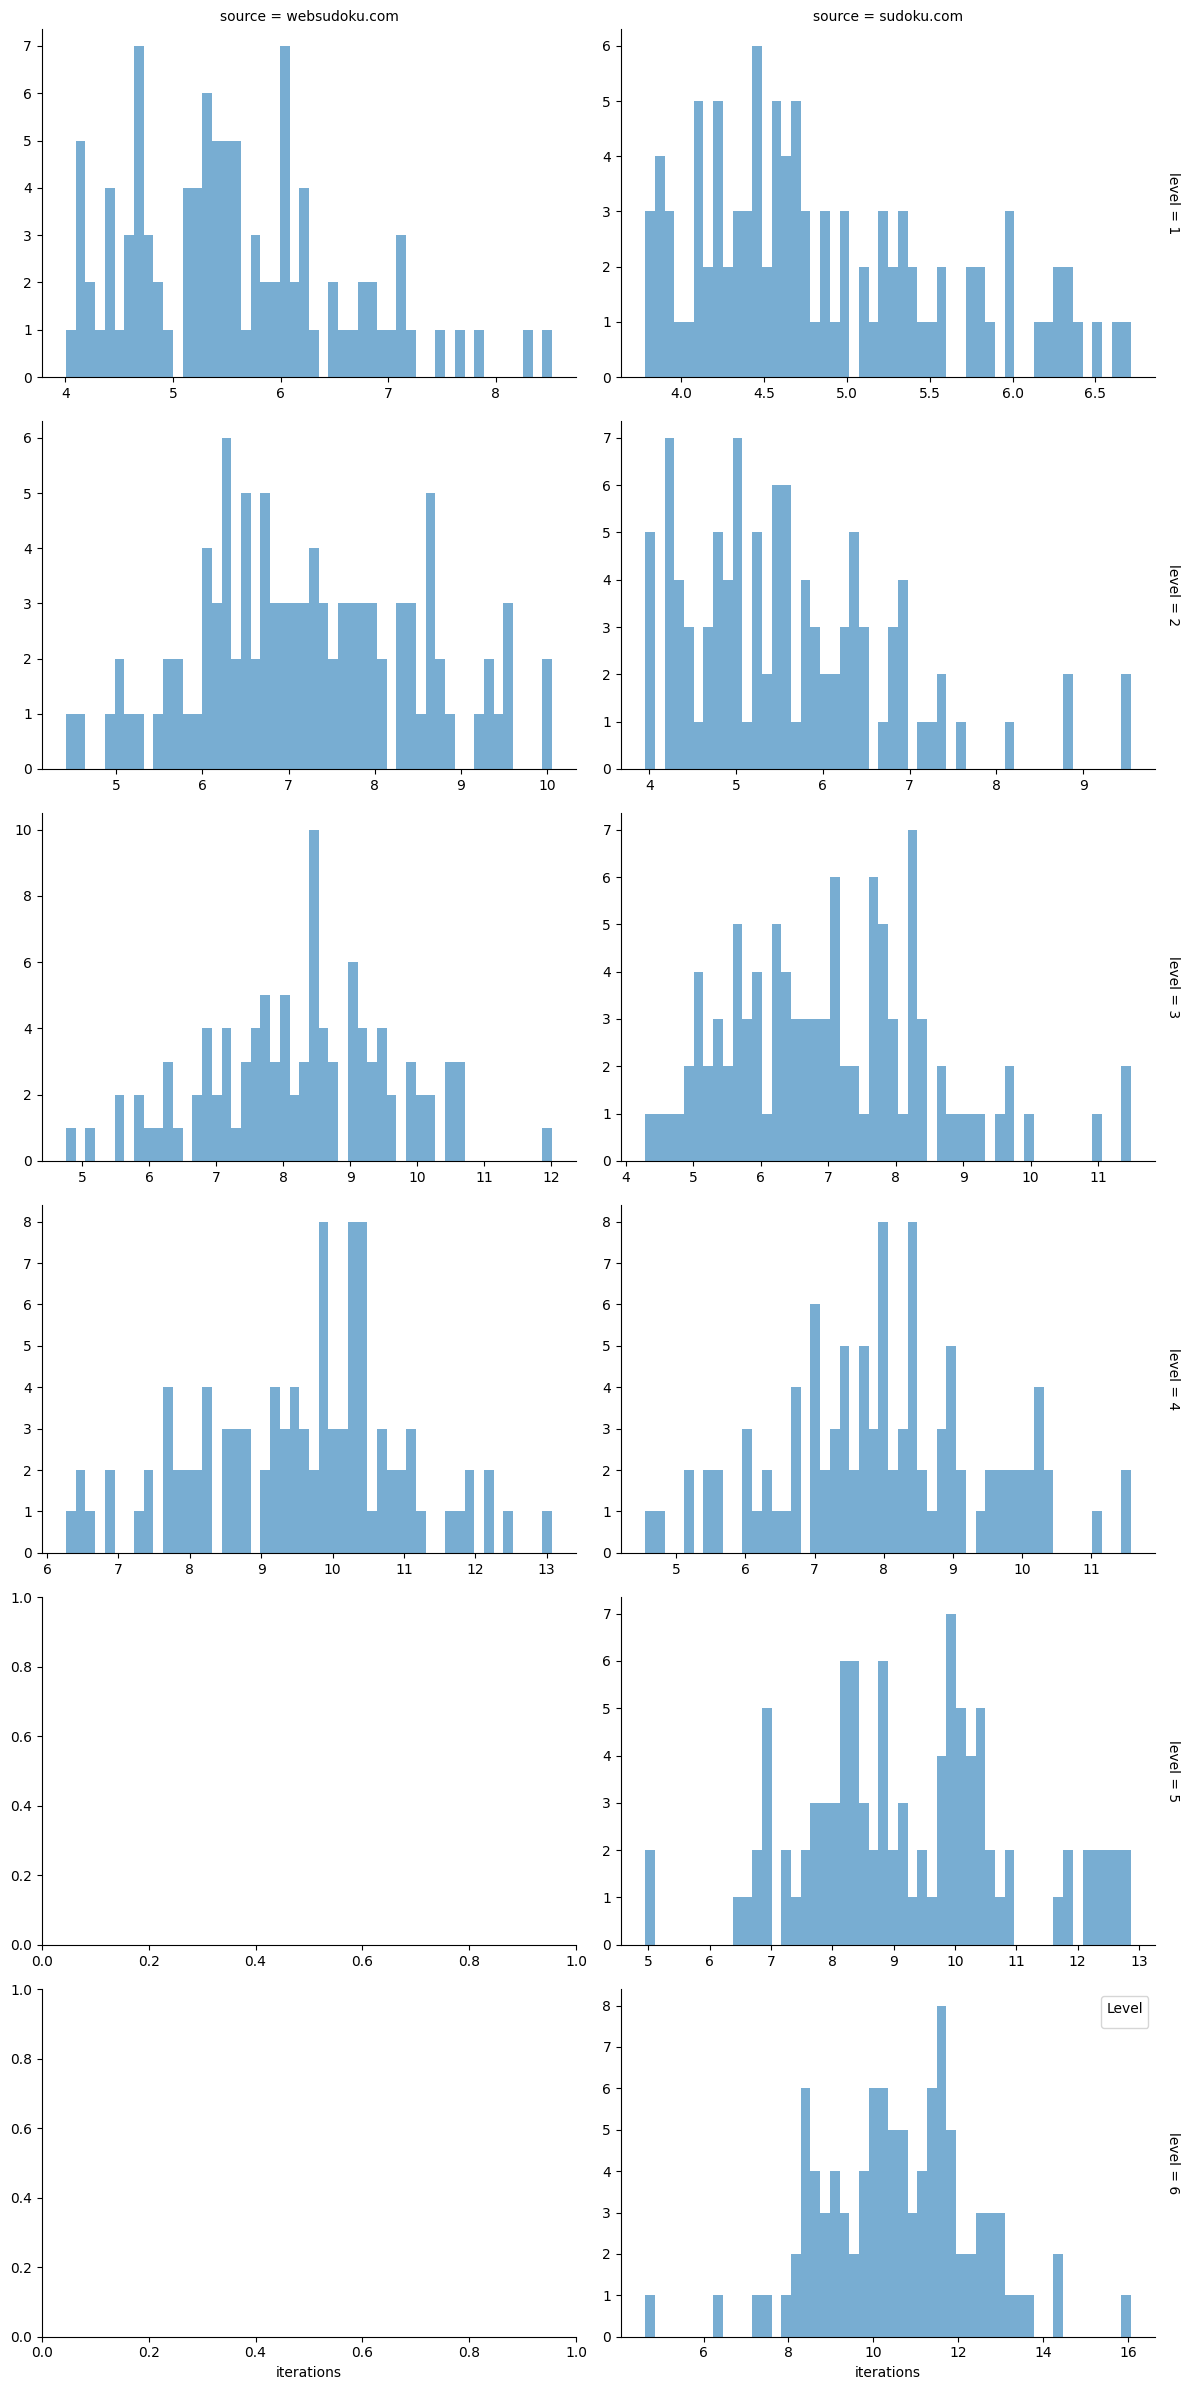

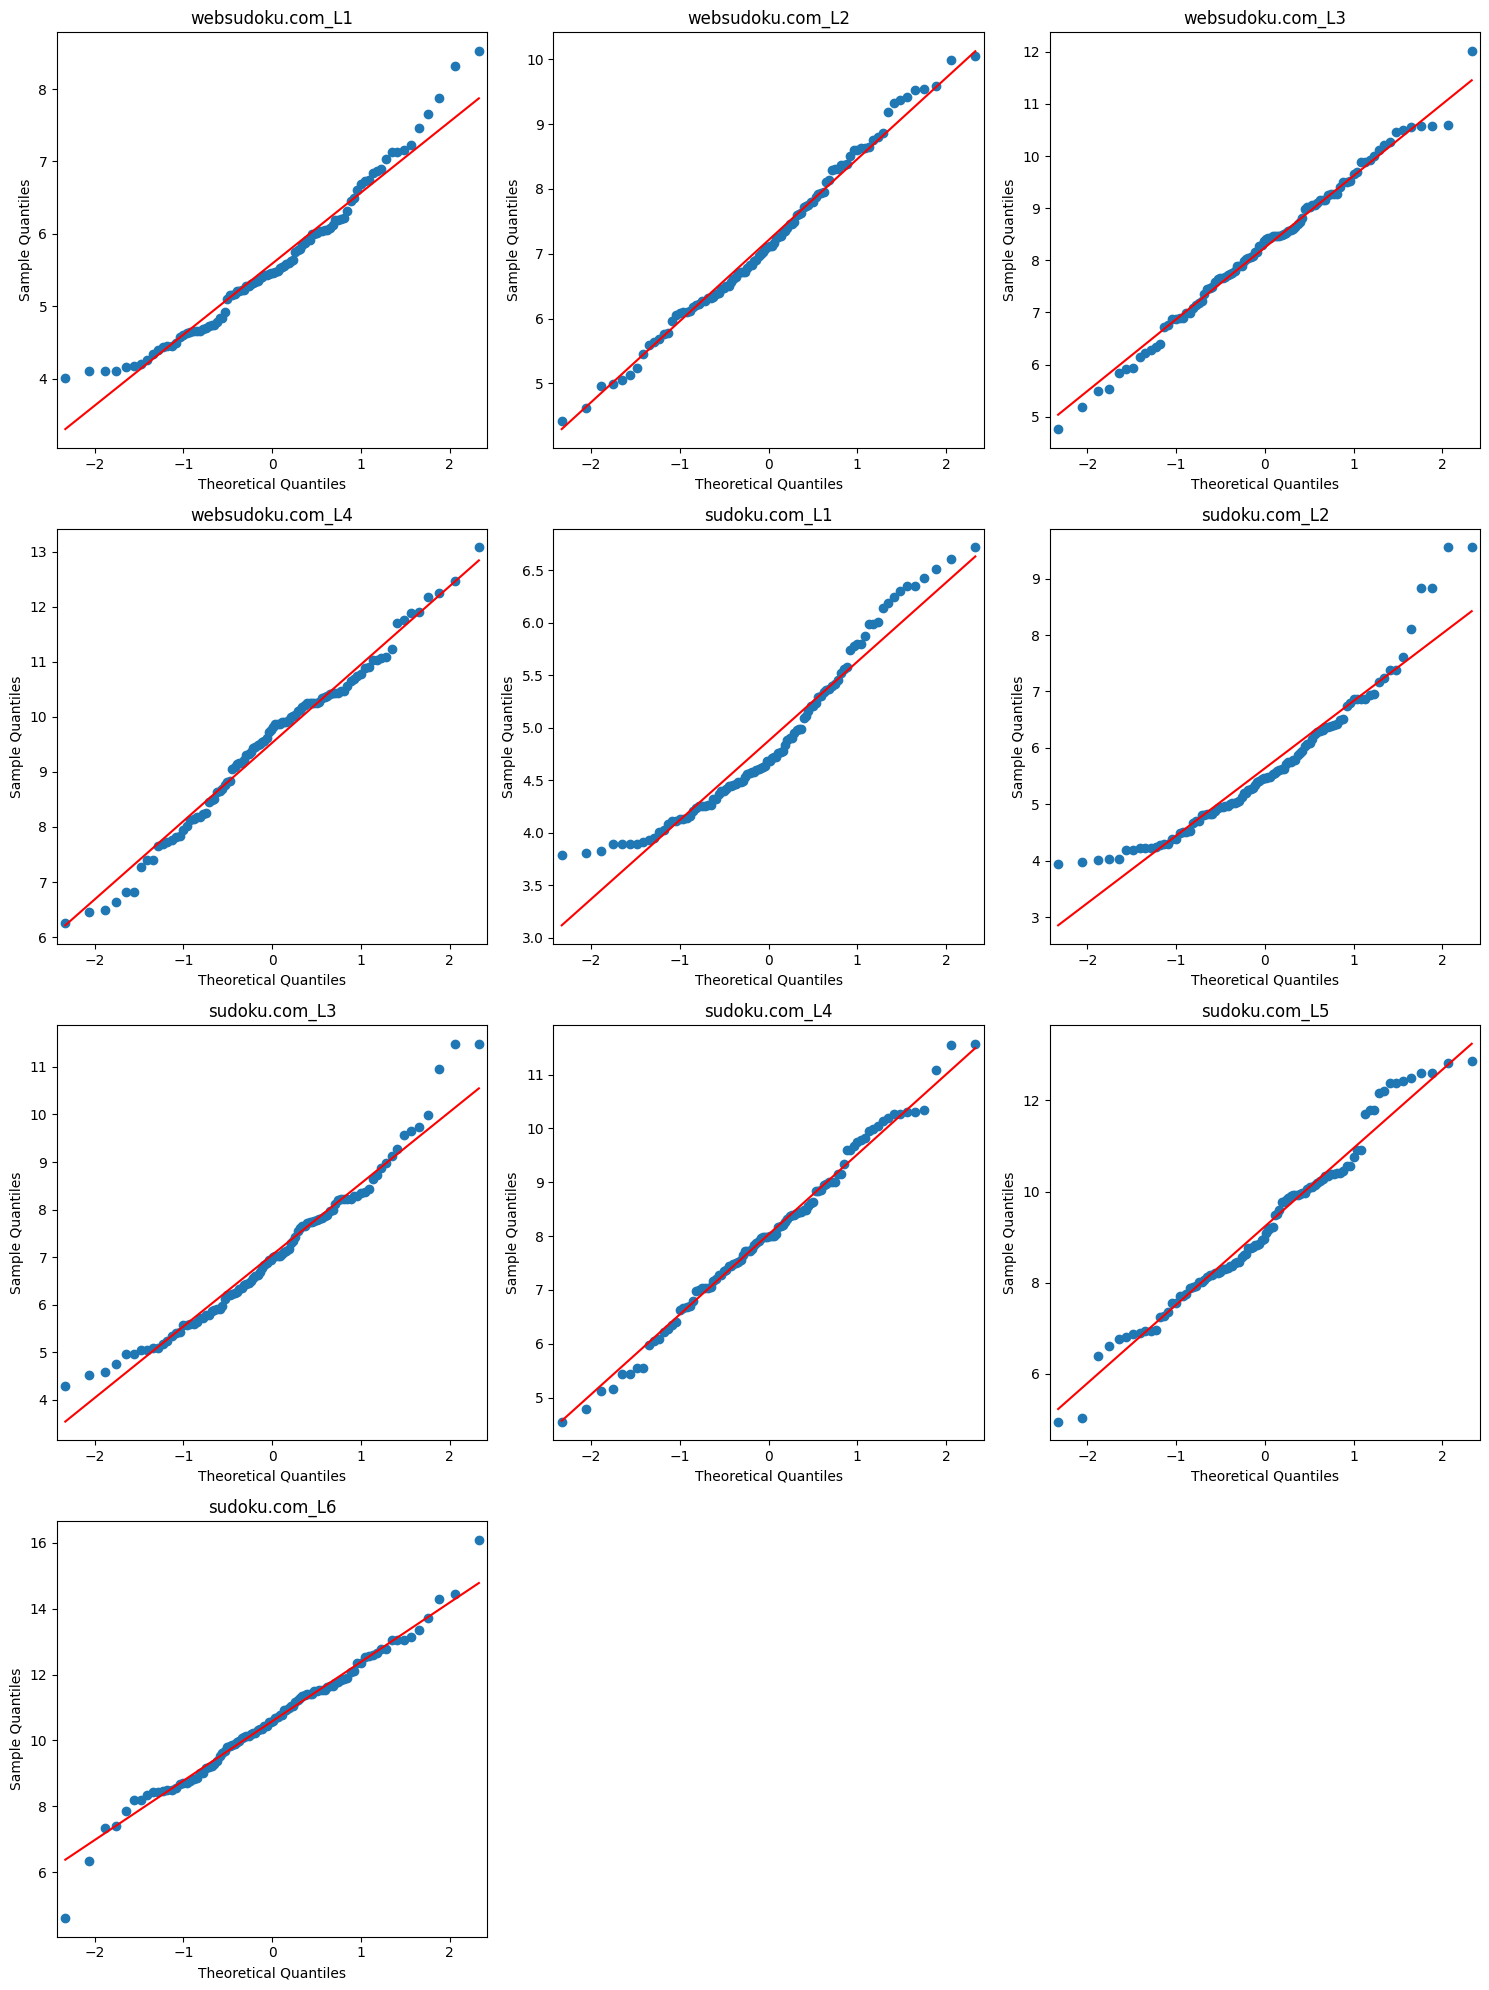

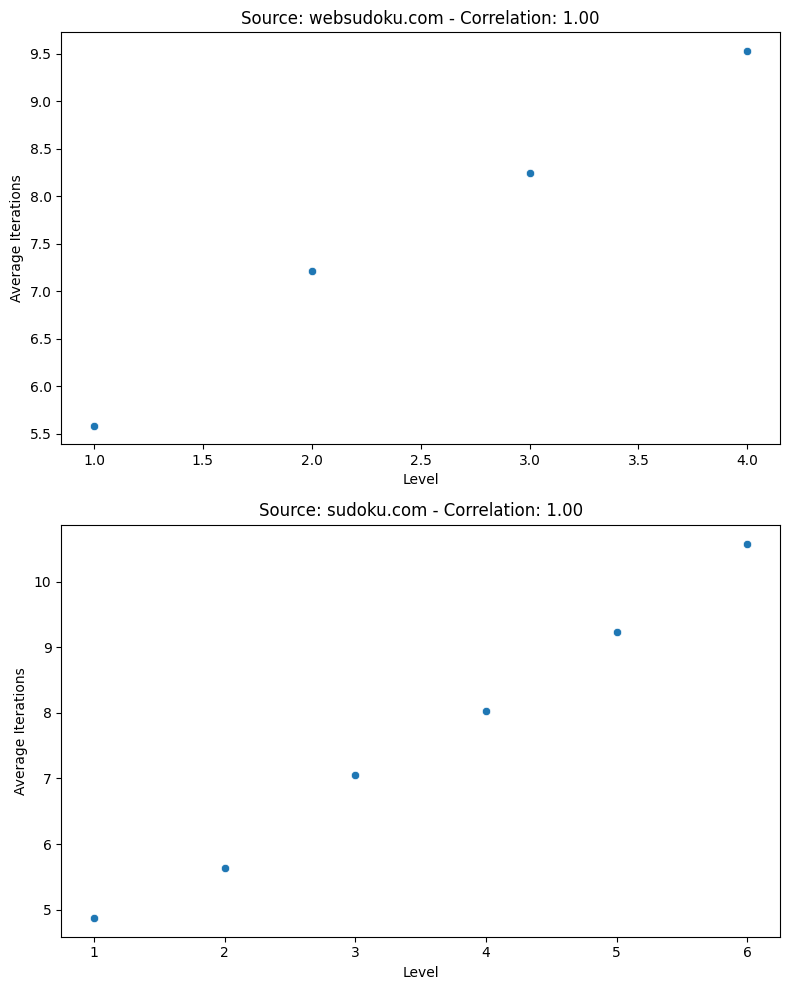

In [29]:
for data_file in (data_files[0],):
    data = pd.read_csv(data_file)
    data["iterations"] = data["iterations"].apply(np.log)
    plot_histograms(data)
    plot_qq_plots(data)
    correlation_analysis(data)

